# Result analysis of empirical experiment

### Statistical tests used
In each of the groups, two tests are performed:

**1. Shapiro-Wilk** test to check whether difference between sample scores follows a normal distribution and thus whether t-test can be used. (From [scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html): "The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution."). Input is vector of paired differences bewteen the two groups.
The following parameters are used:
- H0: the difference is normally distributed 
- H1: the difference is not normally distributed 
- alpha value 0.05

**2. Wilcoxon-Mann-Whitney** test to check for statistically significant differences between the two groups. 
The paired Wilcoxon-Mann-Whitney is an alternative to the more often used student t-test that works on non-normally distributed sample sets. It is used since none of the Shapiro-Wilk tests below indicate normally distributed sample sets.
([scipy docs](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html)).
The following parameters re used:
- H0: there is no statistically significant difference between the two groups' distributions 
- H1: there is a statistically significant difference between the two groups' distributions 
- alpha value 0.05

# Load data

Load the participants' answers (already quantified) into separate dataframes for with DFD and without DFD.

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
xls = pd.ExcelFile('results.xlsx')
df_model_supported = pd.read_excel(xls, 'model-supported condition')[:24]
df_control = pd.read_excel(xls, 'control condition')[:24]
df_questionnaire = pd.read_excel(xls, 'Questionnaire')[:24]

# for overall scores, sum up single tasks
df_model_supported_overall_score = df_model_supported["Task1_analysis_correctness"] + df_model_supported["Task2_analysis_correctness"] + df_model_supported["Task3_analysis_correctness"] + df_model_supported["Task4_analysis_correctness"] + df_model_supported["Task5_analysis_correctness"] + df_model_supported["Task6_analysis_correctness"]
df_control_overall_score = df_control["Task1_analysis_correctness"] + df_control["Task2_analysis_correctness"]+ df_control["Task3_analysis_correctness"] + df_control["Task4_analysis_correctness"] + df_control["Task5_analysis_correctness"] + df_control["Task6_analysis_correctness"]

df_model_supported_overall_evidence = df_model_supported["Task1_correctness_of_evidence"] + df_model_supported["Task2_correctness_of_evidence"] + df_model_supported["Task3_correctness_of_evidence"] + df_model_supported["Task4_correctness_of_evidence"] + df_model_supported["Task5_correctness_of_evidence"] + df_model_supported["Task6_correctness_of_evidence"]
df_control_overall_evidence = df_control["Task1_correctness_of_evidence"] + df_control["Task2_correctness_of_evidence"]+ df_control["Task3_correctness_of_evidence"] + df_control["Task4_correctness_of_evidence"] + df_control["Task5_correctness_of_evidence"] + df_control["Task6_correctness_of_evidence"]

# Test for normal distribution

In [3]:
print("Shapiro Wilk test: \n")

result = stats.shapiro(df_model_supported["Task1_analysis_correctness"] - df_control["Task1_analysis_correctness"])
print("\tTask 1 p-value: ", format(result.pvalue, "f"))

result = stats.shapiro(df_model_supported["Task2_analysis_correctness"] - df_control["Task2_analysis_correctness"])
print("\tTask 2 p-value: ", format(result.pvalue, "f"))

result = stats.shapiro(df_model_supported["Task3_analysis_correctness"] - df_control["Task3_analysis_correctness"])
print("\tTask 3 p-value: ", format(result.pvalue, "f"))

result = stats.shapiro(df_model_supported["Task4_analysis_correctness"] - df_control["Task4_analysis_correctness"])
print("\tTask 4 p-value: ", format(result.pvalue, "f"))

result = stats.shapiro(df_model_supported["Task5_analysis_correctness"] - df_control["Task5_analysis_correctness"])
print("\tTask 5 p-value: ", format(result.pvalue, "f"))

result = stats.shapiro(df_model_supported["Task6_analysis_correctness"] - df_control["Task6_analysis_correctness"])
print("\tTask 6 p-value: ", format(result.pvalue, "f"))

Shapiro Wilk test: 

	Task 1 p-value:  0.000054
	Task 2 p-value:  0.000002
	Task 3 p-value:  0.003203
	Task 4 p-value:  0.002258
	Task 5 p-value:  0.001777
	Task 6 p-value:  0.000002


Calculated p-value for each task is < 0.05, thus the null hypothesis is rejected. The difference between the scores does not follow a normal distribution. The student t-test can not be applied. We are using Wilcoxon-Mann-Whitney instead.

# Analysis correctness

In [4]:
avg_score_model_supported_overall = df_model_supported_overall_score.mean()
avg_score_control_overall = df_control_overall_score.mean()
p_overall = stats.wilcoxon(df_model_supported_overall_score, df_control_overall_score).pvalue

avg_score_model_supported_task1 = df_model_supported["Task1_analysis_correctness"].mean()
avg_score_control_task1 = df_control["Task1_analysis_correctness"].mean()
p_task1 = stats.wilcoxon(df_model_supported["Task1_analysis_correctness"], df_control["Task1_analysis_correctness"]).pvalue

avg_score_model_supported_task2 = df_model_supported["Task2_analysis_correctness"].mean()
avg_score_control_task2 = df_control["Task2_analysis_correctness"].mean()
p_task2 = stats.wilcoxon(df_model_supported["Task2_analysis_correctness"], df_control["Task2_analysis_correctness"]).pvalue

avg_score_model_supported_task3 = df_model_supported["Task3_analysis_correctness"].mean()
avg_score_control_task3 = df_control["Task3_analysis_correctness"].mean()
p_task3 = stats.wilcoxon(df_model_supported["Task3_analysis_correctness"], df_control["Task3_analysis_correctness"]).pvalue

avg_score_model_supported_task4 = df_model_supported["Task4_analysis_correctness"].mean()
avg_score_control_task4 = df_control["Task4_analysis_correctness"].mean()
p_task4 = stats.wilcoxon(df_model_supported["Task4_analysis_correctness"], df_control["Task4_analysis_correctness"]).pvalue

avg_score_model_supported_task5 = df_model_supported["Task5_analysis_correctness"].mean()
avg_score_control_task5 = df_control["Task5_analysis_correctness"].mean()
p_task5 = stats.wilcoxon(df_model_supported["Task5_analysis_correctness"], df_control["Task5_analysis_correctness"]).pvalue

avg_score_model_supported_task6 = df_model_supported["Task6_analysis_correctness"].mean()
avg_score_control_task6 = df_control["Task6_analysis_correctness"].mean()
p_task6 = stats.wilcoxon(df_model_supported["Task6_analysis_correctness"], df_control["Task6_analysis_correctness"]).pvalue

print("\nOverall average analysis correctness")
print("\tControl condition: \t\t", avg_score_control_overall)
print("\tModel-supported condition: \t", avg_score_model_supported_overall)
print(f"\tIncrease of: \t\t\t{((avg_score_model_supported_overall / avg_score_control_overall) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_overall}")

print("\nTask 1 average analysis correctness")
print("\tControl condition: \t\t", avg_score_control_task1)
print("\tModel-supported condition: \t", avg_score_model_supported_task1)
print(f"\tIncrease of: \t\t\t{((avg_score_model_supported_task1 / avg_score_control_task1) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task1}")

print("\nTask 2 average analysis correctness")
print("\tControl condition: \t\t", avg_score_control_task2)
print("\tModel-supported condition: \t", avg_score_model_supported_task2)
print(f"\tIncrease of: \t\t\t{((avg_score_model_supported_task2 / avg_score_control_task2) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task2}")

print("\nTask 3 average analysis correctness")
print("\tControl condition: \t\t", avg_score_control_task3)
print("\tModel-supported condition: \t", avg_score_model_supported_task3)
print(f"\tIncrease of: \t\t\t{((avg_score_model_supported_task3 / avg_score_control_task3) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task3}")

print("\nTask 4 average analysis correctness")
print("\tControl condition: \t\t", avg_score_control_task4)
print("\tModel-supported condition: \t", avg_score_model_supported_task4)
print(f"\tIncrease of: \t\t\t{((avg_score_model_supported_task4 / avg_score_control_task4) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task4}")

print("\nTask 5 average analysis correctness")
print("\tControl condition: \t\t", avg_score_control_task5)
print("\tModel-supported condition: \t", avg_score_model_supported_task5)
print(f"\tIncrease of: \t\t\t{((avg_score_model_supported_task5 / avg_score_control_task5) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task5}")

print("\nTask 6 average analysis correctness")
print("\tControl condition: \t\t", avg_score_control_task6)
print("\tModel-supported condition: \t", avg_score_model_supported_task6)
print(f"\tIncrease of: \t\t\t{((avg_score_model_supported_task6 / avg_score_control_task6) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task6}")



Overall average analysis correctness
	Control condition: 		 4.791666666666667
	Model-supported condition: 	 6.75
	Increase of: 			40.86956521739129%
	Wilcoxon test p-value: 		0.002475768009299668

Task 1 average analysis correctness
	Control condition: 		 0.625
	Model-supported condition: 	 0.8333333333333334
	Increase of: 			33.33333333333335%
	Wilcoxon test p-value: 		0.0955807045456294

Task 2 average analysis correctness
	Control condition: 		 0.4166666666666667
	Model-supported condition: 	 0.4583333333333333
	Increase of: 			9.999999999999986%
	Wilcoxon test p-value: 		0.6547208460185769

Task 3 average analysis correctness
	Control condition: 		 0.875
	Model-supported condition: 	 1.75
	Increase of: 			100.0%
	Wilcoxon test p-value: 		0.0003360195026145452

Task 4 average analysis correctness
	Control condition: 		 0.8333333333333334
	Model-supported condition: 	 1.3333333333333333
	Increase of: 			59.999999999999986%
	Wilcoxon test p-value: 		0.06862318401276875

Task 5 averag

/Users/simon/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/Users/simon/anaconda3/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


# Correctness of evidence

In [5]:
avg_evidence_model_supported_overall = df_model_supported_overall_evidence.mean()
avg_evidence_control_overall = df_control_overall_evidence.mean()
p_overall = stats.wilcoxon(df_model_supported_overall_evidence, df_control_overall_evidence).pvalue

avg_evidence_model_supported_task1 = df_model_supported["Task1_correctness_of_evidence"].mean()
avg_evidence_control_task1 = df_control["Task1_correctness_of_evidence"].mean()
p_task1 = stats.wilcoxon(df_model_supported["Task1_correctness_of_evidence"], df_control["Task1_correctness_of_evidence"]).pvalue

avg_evidence_model_supported_task2 = df_model_supported["Task2_correctness_of_evidence"].mean()
avg_evidence_control_task2 = df_control["Task2_correctness_of_evidence"].mean()
p_task2 = stats.wilcoxon(df_model_supported["Task2_correctness_of_evidence"], df_control["Task2_correctness_of_evidence"]).pvalue

avg_evidence_model_supported_task3 = df_model_supported["Task3_correctness_of_evidence"].mean()
avg_evidence_control_task3 = df_control["Task3_correctness_of_evidence"].mean()
p_task3 = stats.wilcoxon(df_model_supported["Task3_correctness_of_evidence"], df_control["Task3_correctness_of_evidence"]).pvalue

avg_evidence_model_supported_task4 = df_model_supported["Task4_correctness_of_evidence"].mean()
avg_evidence_control_task4 = df_control["Task4_correctness_of_evidence"].mean()
p_task4 = stats.wilcoxon(df_model_supported["Task4_correctness_of_evidence"], df_control["Task4_correctness_of_evidence"]).pvalue

avg_evidence_model_supported_task5 = df_model_supported["Task5_correctness_of_evidence"].mean()
avg_evidence_control_task5 = df_control["Task5_correctness_of_evidence"].mean()
p_task5 = stats.wilcoxon(df_model_supported["Task5_correctness_of_evidence"], df_control["Task5_correctness_of_evidence"]).pvalue

avg_evidence_model_supported_task6 = df_model_supported["Task6_correctness_of_evidence"].mean()
avg_evidence_control_task6 = df_control["Task6_correctness_of_evidence"].mean()
p_task6 = stats.wilcoxon(df_model_supported["Task6_correctness_of_evidence"], df_control["Task6_correctness_of_evidence"]).pvalue



print("\nOverall average correctness of evidence")
print("\tControl condition: \t\t", avg_evidence_control_overall)
print("\tModel-supported condition: \t", avg_evidence_model_supported_overall)
print(f"\tIncrease of: \t\t\t{((avg_evidence_model_supported_overall / avg_evidence_control_overall) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_overall}")

print("\nTask 1 average correctness of evidence")
print("\tControl condition: \t\t", avg_evidence_control_task1)
print("\tModel-supported condition: \t", avg_evidence_model_supported_task1)
print(f"\tIncrease of: \t\t\t{((avg_evidence_model_supported_task1 / avg_evidence_control_task1) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task1}")

print("\nTask 2 average correctness of evidence")
print("\tControl condition: \t\t", avg_evidence_control_task2)
print("\tModel-supported condition: \t", avg_evidence_model_supported_task2)
print(f"\tIncrease of: \t\t\t{((avg_evidence_model_supported_task2 / avg_evidence_control_task2) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task2}")

print("\nTask 3 average correctness of evidence")
print("\tControl condition: \t\t", avg_evidence_control_task3)
print("\tModel-supported condition: \t", avg_evidence_model_supported_task3)
print(f"\tIncrease of: \t\t\t{((avg_evidence_model_supported_task3 / avg_evidence_control_task3) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task3}")

print("\nTask 4 average correctness of evidence")
print("\tControl condition: \t\t", avg_evidence_control_task4)
print("\tModel-supported condition: \t", avg_evidence_model_supported_task4)
print(f"\tIncrease of: \t\t\t{((avg_evidence_model_supported_task4 / avg_evidence_control_task4) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task4}")

print("\nTask 5 average correctness of evidence")
print("\tControl condition: \t\t", avg_evidence_control_task5)
print("\tModel-supported condition: \t", avg_evidence_model_supported_task5)
print(f"\tIncrease of: \t\t\t{((avg_evidence_model_supported_task5 / avg_evidence_control_task5) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task5}")

print("\nTask 6 average correctness of evidence")
print("\tControl condition: \t\t", avg_evidence_control_task6)
print("\tModel-supported condition: \t", avg_evidence_model_supported_task6)
print(f"\tIncrease of: \t\t\t{((avg_evidence_model_supported_task6 / avg_evidence_control_task6) - 1) * 100}%")
print(f"\tWilcoxon test p-value: \t\t{p_task6}")


Overall average correctness of evidence
	Control condition: 		 3.0833333333333335
	Model-supported condition: 	 2.7083333333333335
	Increase of: 			-12.16216216216216%
	Wilcoxon test p-value: 		0.5214391027309827

Task 1 average correctness of evidence
	Control condition: 		 0.5833333333333334
	Model-supported condition: 	 0.625
	Increase of: 			7.14285714285714%
	Wilcoxon test p-value: 		0.763024600552995

Task 2 average correctness of evidence
	Control condition: 		 0.375
	Model-supported condition: 	 0.2916666666666667
	Increase of: 			-22.22222222222222%
	Wilcoxon test p-value: 		0.4142161782425253

Task 3 average correctness of evidence
	Control condition: 		 0.5416666666666666
	Model-supported condition: 	 0.5833333333333334
	Increase of: 			7.692307692307709%
	Wilcoxon test p-value: 		0.8623197383894363

Task 4 average correctness of evidence
	Control condition: 		 0.2916666666666667
	Model-supported condition: 	 0.125
	Increase of: 			-57.14285714285714%
	Wilcoxon test p-value

# Time

In [6]:
avg_time_model_supported = df_model_supported["Time (minutes)"].mean()
avg_time_control = df_control["Time (minutes)"].mean()
print("Average time overal:")
print("\tControl condition: \t\t", avg_time_control)
print("\tModel-supported condition: \t", avg_time_model_supported)

Average time overal:
	Control condition: 		 33.56521739130435
	Model-supported condition: 	 35.42857142857143


# Participants

**Work experience**

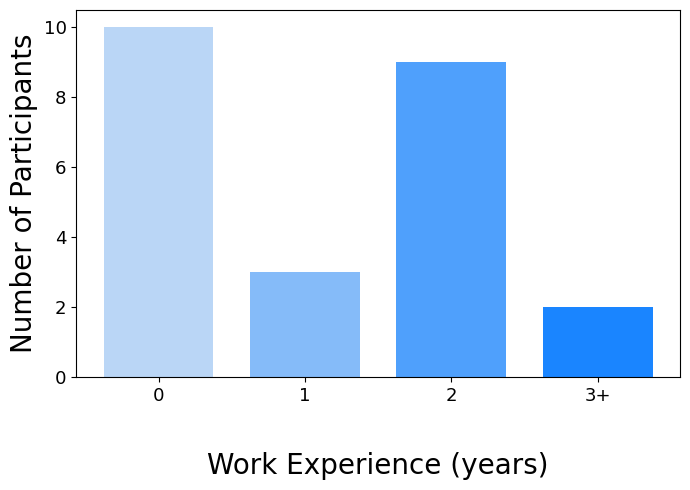

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D


value_counts = df_questionnaire["Work experience"].value_counts().sort_index()

labels = ("0\n\n", "1", "2", "3+")

scores = [value_counts[0], 
          value_counts[1], 
          value_counts[2],
          value_counts[3]]

# Choose a color palette
palette = sns.light_palette("#1A85FF", 5)[1:]

fig, ax = plt.subplots(figsize=(7, 5))

num_tasks = len(labels)

bar_width = 0.3  # Adjust the width of the bars

# Create an array with positions for the bars
positions = np.arange(0, num_tasks * 0.4, 0.4)

# Create the bars
ax.bar(positions, scores, bar_width, color=palette)

# Set axis labels
ax.set_xlabel("Work Experience (years)", fontsize = 20)
ax.set_ylabel("Number of Participants", fontsize = 20)

ax.tick_params(axis='x', which='major', labelsize=13)
ax.tick_params(axis='y', which='major', labelsize=13)

# Update x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels)#, fontsize = 20)

plt.tight_layout()
plt.savefig("./plots/work_experience.pdf", dpi=900)
plt.show()

In [9]:
print("Average work experience in years: ", df_questionnaire["Work experience"].mean())

Average work experience in years:  1.125


**Programming experience**

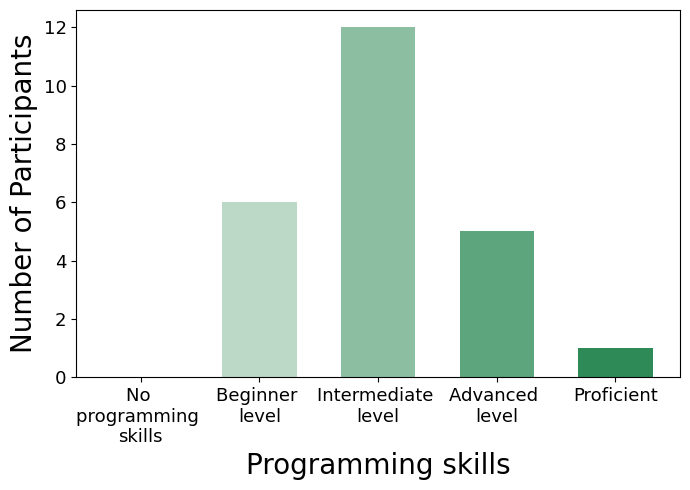

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D


value_counts = df_questionnaire["Programming skill"].value_counts().sort_index()

labels = ("No \nprogramming \nskills", 
          "Beginner \nlevel", 
          "Intermediate \nlevel", 
          "Advanced \nlevel", 
          "Proficient")

scores = [0, # put in manually, reading from file crashes ebcause of zero values
          value_counts[2], 
          value_counts[3],
          value_counts[4],
          value_counts[5]]

# Choose a color palette
palette = sns.light_palette("seagreen", 5)

fig, ax = plt.subplots(figsize=(7, 5))

num_tasks = len(labels)

bar_width = 0.5  # Adjust the width of the bars

# Create an array with positions for the bars
positions = np.arange(0, num_tasks * 0.8, 0.8)

# Create the bars
ax.bar(positions, scores, bar_width, color=palette)

# Set axis labels
ax.set_xlabel("Programming skills", fontsize = 20)
ax.set_ylabel("Number of Participants", fontsize = 20)

# Update x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels)#, rotation=60)

ax.tick_params(axis='x', which='major', labelsize=13)
ax.tick_params(axis='y', which='major', labelsize=13)

plt.tight_layout()
plt.savefig("./plots/programming_skills.pdf", dpi=900)
plt.show()

**Java reading experience**

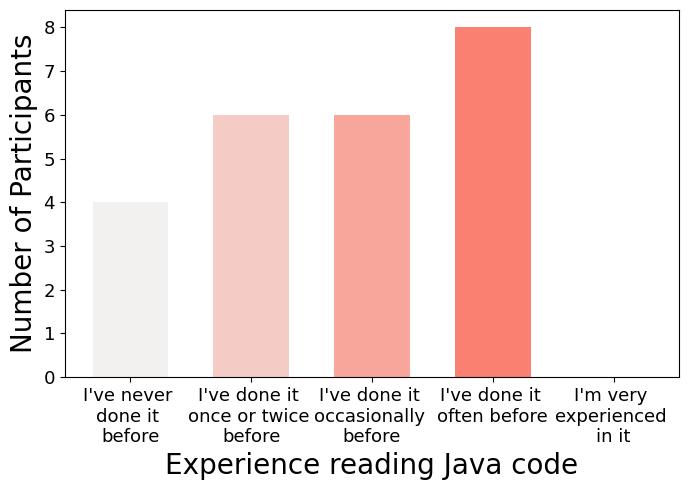

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D


value_counts = df_questionnaire["Reading Java code experience"].value_counts().sort_index()

labels = ("I've never \ndone it \nbefore", 
          "I've done it \nonce or twice \nbefore", 
          "I've done it \noccasionally \nbefore", 
          "I've done it \noften before", 
          "I'm very \nexperienced \nin it")

scores = [value_counts[1], 
          value_counts[2], 
          value_counts[3],
          value_counts[4],
          0]# put in manually, reading from file crashes ebcause of zero values

# Choose a color palette
palette = sns.light_palette("salmon", 4)

fig, ax = plt.subplots(figsize=(7, 5))

num_tasks = len(labels)

bar_width = 0.5  # Adjust the width of the bars

# Create an array with positions for the bars
positions = np.arange(0, num_tasks * 0.8, 0.8)

# Create the bars
ax.bar(positions, scores, bar_width, color=palette)

# Set axis labels
ax.set_xlabel("Experience reading Java code", fontsize = 20)
ax.set_ylabel("Number of Participants", fontsize = 20)


# Update x-axis tick positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(labels)#, rotation=60)

ax.tick_params(axis='x', which='major', labelsize=13)
ax.tick_params(axis='y', which='major', labelsize=13)

plt.tight_layout()
plt.savefig("./plots/java_reading_experience.pdf", dpi=900)
plt.show()

# Plots

## Analysis correctness

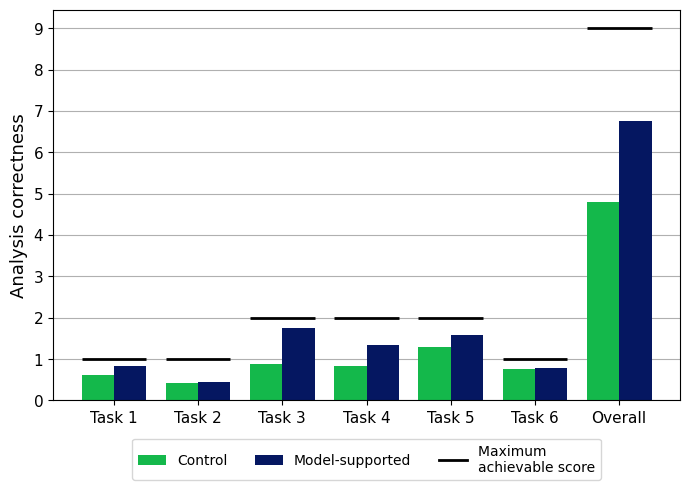

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# Manually provide the data
labels = ("Task 1", "Task 2", "Task 3", "Task 4", "Task 5", "Task 6", "Overall")
max_scores = [1, 1, 2, 2, 2, 1, 9]
scores_model_supported = [avg_score_model_supported_task1, 
                   avg_score_model_supported_task2, 
                   avg_score_model_supported_task3, 
                   avg_score_model_supported_task4, 
                   avg_score_model_supported_task5, 
                   avg_score_model_supported_task6, 
                   avg_score_model_supported_overall]
scores_control = [avg_score_control_task1, 
                      avg_score_control_task2, 
                      avg_score_control_task3, 
                      avg_score_control_task4, 
                      avg_score_control_task5, 
                      avg_score_control_task6, 
                      avg_score_control_overall]

    
# Combine the data into a dictionary
resource_usage = {"Control": scores_control, "Model-supported": scores_model_supported}

# Choose a color palette
#palette = sns.color_palette("cubehelix")
palette = ["#14b84b", "#051761"]

fig, ax = plt.subplots(figsize=(7, 5))


num_tasks = len(labels)

bar_width = 0.25  # Adjust the width of the bars
gap_width = 0.15  # Adjust the width of the gaps between pairs of bars

# Create empty lists to store handles and labels
handles = []
legend_labels = []

# Create an array with positions for the bars
positions = np.arange(num_tasks) * (bar_width * 2 + gap_width)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    color = palette[index % len(palette)]
    # Adjust the positions of the bars based on the index
    task_positions = positions + index * bar_width
    p = ax.bar(task_positions, resource, bar_width, label=boolean, color=color)
    # Append the handle (p) and the label (boolean) to the lists
    handles.append(p)
    legend_labels.append(boolean)

for task_position, max_score in zip(positions, max_scores):
    ax.hlines(max_score, task_position - bar_width / 2, task_position + bar_width * 2 - bar_width / 2, colors='k', linewidth=2, linestyles='solid')

    
#ax.set_title("Average score with / without provided DFD.")

# Set axis labels
#ax.set_xlabel("Task")
ax.set_ylabel("Analysis correctness", fontsize = 13)

# Update x-axis tick positions and labels
ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(labels)

ax.tick_params(axis='x', which='major', labelsize=11)
ax.tick_params(axis='y', which='major', labelsize=11)

ax.set_yticks(np.arange(0, 10, 1.0))
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Create a Line2D object for the maximum achievable score lines
max_score_line = Line2D([0], [0], color='k', linewidth=2, linestyle='solid', label='Maximum \nachievable score')

# Add the Line2D object to the list of handles and legend labels
handles.append(max_score_line)
legend_labels.append(max_score_line.get_label())

# Reorder the handles and labels as desired
desired_order = [0, 1, 2]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

# Create a custom legend with the specified order and place it outside the figure
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol = 3)

plt.tight_layout()
plt.savefig("./plots/average_score_plot.pdf", dpi=900)
plt.show()


## Correctness of evidence

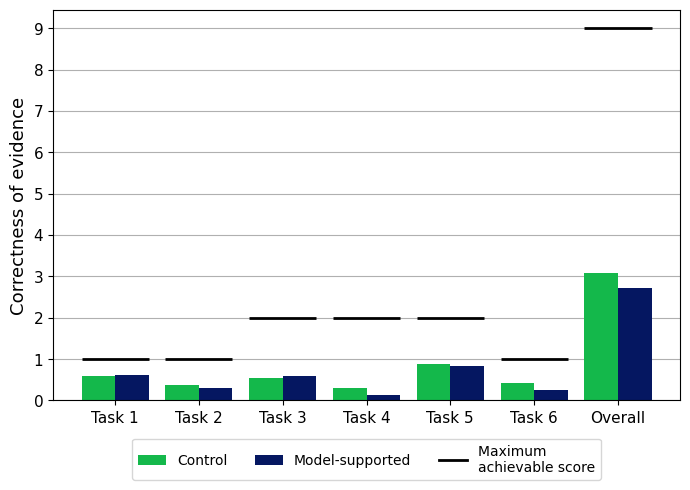

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# Manually provide the data
labels = ("Task 1", "Task 2", "Task 3", "Task 4", "Task 5", "Task 6", "Overall")
max_scores = [1, 1, 2, 2, 2, 1, 9]
evidence_model_supported = [avg_evidence_model_supported_task1, 
                   avg_evidence_model_supported_task2, 
                   avg_evidence_model_supported_task3, 
                   avg_evidence_model_supported_task4, 
                   avg_evidence_model_supported_task5, 
                   avg_evidence_model_supported_task6, 
                   avg_evidence_model_supported_overall]
evidence_control = [avg_evidence_control_task1, 
                      avg_evidence_control_task2, 
                      avg_evidence_control_task3, 
                      avg_evidence_control_task4, 
                      avg_evidence_control_task5, 
                      avg_evidence_control_task6, 
                      avg_evidence_control_overall]

    
# Combine the data into a dictionary
resource_usage = {"Control": evidence_control, "Model-supported": evidence_model_supported}

# Choose a color palette
#palette = sns.color_palette("cubehelix")
palette = ["#14b84b", "#051761"]

fig, ax = plt.subplots(figsize=(7, 5))

num_tasks = len(labels)

bar_width = 0.4  # Adjust the width of the bars
gap_width = 0.2  # Adjust the width of the gaps between pairs of bars

# Create empty lists to store handles and labels
handles = []
legend_labels = []

# Create an array with positions for the bars
positions = np.arange(num_tasks) * (bar_width * 2 + gap_width)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    color = palette[index % len(palette)]
    # Adjust the positions of the bars based on the index
    task_positions = positions + index * bar_width
    p = ax.bar(task_positions, resource, bar_width, label=boolean, color=color)
    # Append the handle (p) and the label (boolean) to the lists
    handles.append(p)
    legend_labels.append(boolean)

for task_position, max_score in zip(positions, max_scores):
    ax.hlines(max_score, task_position - bar_width / 2, task_position + bar_width * 2 - bar_width / 2, colors='k', linewidth=2, linestyles='solid')

    
#ax.set_title("Average score with / without provided DFD.")

# Set axis labels
#ax.set_xlabel("Task")
ax.set_ylabel("Correctness of evidence", fontsize = 13)

ax.set_yticks(np.arange(0, 10, 1.0))
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Update x-axis tick positions and labels
ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(labels)

ax.tick_params(axis='x', which='major', labelsize=11)
ax.tick_params(axis='y', which='major', labelsize=11)

# Create a Line2D object for the maximum achievable score lines
max_score_line = Line2D([0], [0], color='k', linewidth=2, linestyle='solid', label='Maximum \nachievable score')

# Add the Line2D object to the list of handles and legend labels
handles.append(max_score_line)
legend_labels.append(max_score_line.get_label())

# Reorder the handles and labels as desired
desired_order = [0, 1, 2]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

# Create a custom legend with the specified order and place it outside the figure
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol = 3)

plt.tight_layout()
plt.savefig("./plots/average_evidence_plot.pdf", dpi=900)
plt.show()


## Usage of provided artefacts

In [12]:
resource_usage = dict()

none_used_list, documentation_used_list = list(), list()
code_used_list, dfd_used_list, traceability_used_list = list(), list(), list()

for answer in ["Task1_resource", "Task2_resource", "Task3_resource", "Task4_resource", "Task5_resource", "Task6_resource"]:
    none_used, documentation_used, code_used, dfd_used, traceability_used = 0, 0, 0, 0, 0
    for line_nr in range(len(df_model_supported)):
        if "0" in str(df_model_supported[answer][line_nr]):
            none_used += 1
        if "1" in str(df_model_supported[answer][line_nr]):
            documentation_used += 1
        if "2" in str(df_model_supported[answer][line_nr]):
            code_used += 1
        if "3" in str(df_model_supported[answer][line_nr]):
            dfd_used += 1
        if "4" in str(df_model_supported[answer][line_nr]):
            traceability_used += 1
    none_used_list.append(none_used)
    documentation_used_list.append(documentation_used)
    code_used_list.append(code_used)
    dfd_used_list.append(dfd_used)
    traceability_used_list.append(traceability_used)

resource_usage["None or could not Answer"] = np.array(none_used_list)
resource_usage["Textual Description"] = np.array(documentation_used_list)
resource_usage["Source Code"] = np.array(code_used_list)
resource_usage["Dataflow Diagram"] = np.array(dfd_used_list)
resource_usage["Traceability Information"] = np.array(traceability_used_list)

print("Total answers \"None or could not Answer\": ", sum(resource_usage["None or could not Answer"]))
print("Total answers \"Documentation\": ", sum(resource_usage["Textual Description"]))
print("Total answers \"Source Code\": ", sum(resource_usage["Source Code"]))
print("Total answers \"Dataflow Diagram\": ", sum(resource_usage["Dataflow Diagram"]))
print("Total answers \"Traceability\": ", sum(resource_usage["Traceability Information"]))

Total answers "None or could not Answer":  1
Total answers "Documentation":  21
Total answers "Source Code":  55
Total answers "Dataflow Diagram":  88
Total answers "Traceability":  43


(0.3292772926340829, 0.4762845556584382, 0.1837155549758328)
(0.6328422475018423, 0.4747981096220677, 0.29070209208025455)
(0.8146245329198283, 0.49548316572322215, 0.5752525936416857)
(0.812420762188067, 0.6167295569758052, 0.8578575836301946)
(0.7587183008012618, 0.7922069335474338, 0.9543861221913403)


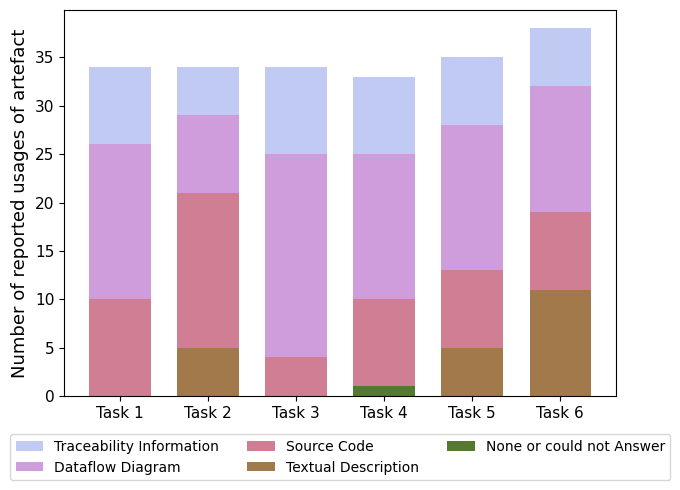

In [93]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 5))

labels = ("Task 1", "Task 2", "Task 3", "Task 4", "Task 5", "Task 6")

bottom = np.zeros(6)
width = 0.7

handles = []
legend_labels = []
palette = sns.color_palette("cubehelix", 9)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    color = palette[(index % len(palette)) + 3]
    print(color)
    p = ax.bar(labels, resource, width, label=boolean, bottom=bottom, color=color)
    bottom += resource
    
    handles.append(p)
    legend_labels.append(boolean)

#ax.set_title("Number of reported usage of the provided resources.")

#ax.set_xlabel("Task")
ax.set_ylabel("Number of reported usages of artefact", fontsize = 13)

ax.tick_params(axis='x', which='major', labelsize=11)
ax.tick_params(axis='y', which='major', labelsize=11)

desired_order = [4, 3, 2, 1, 0]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol = 3)

plt.tight_layout()
plt.savefig("./plots/resource_usage_plot.pdf", dpi=900)
plt.show()

## Comparing analysis correctness between groups Using Artefact and Not Using Artefact

For each resource, we separate the participants into: \
    - Using Artefact group = those that gave that resource more than 50% as answer to the questions of which resource was used \
    - Not Using Artefact group = the others \
Then, we compare the average scores of the two groups.

In [13]:
number_none_users, number_non_none_users = 0, 0
score_none_users, score_non_none_users = 0, 0

number_documentation_users, number_non_documentation_users = 0, 0
score_documentation_users, score_non_documentation_users = 0, 0

number_code_users, number_non_code_users = 0, 0
score_code_users, score_non_code_users = 0, 0

number_dfd_users, number_non_dfd_users = 0, 0
score_dfd_users, score_non_dfd_users = 0, 0

number_traceability_users, number_non_traceability_users = 0, 0
score_traceability_users, score_non_traceability_users = 0, 0

for line_nr in range(len(df_model_supported)):
    # number of "DFD" answers in questions for resource
    none_uses, documentation_uses, code_uses, dfd_uses, traceability_uses  = 0, 0, 0, 0, 0
    for answer in ["Task1_resource", "Task2_resource", "Task3_resource", "Task4_resource", "Task5_resource", "Task6_resource"]:
        if "0" in str(df_model_supported[answer][line_nr]):
            none_uses += 1
        if "1" in str(df_model_supported[answer][line_nr]):
            documentation_uses += 1
        if "2" in str(df_model_supported[answer][line_nr]):
            code_uses += 1
        if "3" in str(df_model_supported[answer][line_nr]):
            dfd_uses += 1
        if "4" in str(df_model_supported[answer][line_nr]):
            traceability_uses += 1
    # if number of usages if 4 or higher (i.e. above 50%) for a given resource, add that participant's score to one var, else to another.
    # none
    if none_uses >= 4:
        number_none_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_none_users += df_model_supported[answer][line_nr]
    else:
        number_non_none_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_none_users += df_model_supported[answer][line_nr]
    
    # documentation
    if documentation_uses >= 4:
        number_documentation_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_documentation_users += df_model_supported[answer][line_nr]
    else:
        number_non_documentation_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_documentation_users += df_model_supported[answer][line_nr]
    
    # code
    if code_uses >= 4:
        number_code_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_code_users += df_model_supported[answer][line_nr]
    else:
        number_non_code_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_code_users += df_model_supported[answer][line_nr]
    
    # dfd
    if dfd_uses >= 4:
        number_dfd_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_dfd_users += df_model_supported[answer][line_nr]
    else:
        number_non_dfd_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_dfd_users += df_model_supported[answer][line_nr]
            
    # traceability
    if traceability_uses >= 4:
        number_traceability_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_traceability_users += df_model_supported[answer][line_nr]
    else:
        number_non_traceability_users += 1
        for answer in ["Task1_analysis_correctness", "Task2_analysis_correctness", "Task3_analysis_correctness", "Task4_analysis_correctness", "Task5_analysis_correctness", "Task6_analysis_correctness"]:
            score_non_traceability_users += df_model_supported[answer][line_nr]
#    print(dfd_uses, score_dfd_users)

average_score_code_users = score_code_users / number_code_users
average_score_non_code_users = score_non_code_users / number_non_code_users

average_score_dfd_users = score_dfd_users / number_dfd_users
average_score_non_dfd_users = score_non_dfd_users / number_non_dfd_users

average_score_traceability_users = score_traceability_users / number_traceability_users
average_score_non_traceability_users = score_non_traceability_users / number_non_traceability_users

print(f"Number code users: {number_code_users}")
print(f"Average score code users: {average_score_code_users}")
print(f"Average score non-code users: {average_score_non_code_users}")
print(f"Increase of: {((average_score_code_users / average_score_non_code_users) - 1) * 100}%")
print("\n")
print(f"Number dfd users: {number_dfd_users}")
print(f"Average score DFD users: {average_score_dfd_users}")
print(f"Average score non-DFD users: {average_score_non_dfd_users}")
print(f"Increase of: {((average_score_dfd_users / average_score_non_dfd_users) - 1) * 100}%")
print("\n")
print(f"Number traceability users: {number_traceability_users}")
print(f"Average score traceability users: {average_score_traceability_users}")
print(f"Average score non-traceability users: {average_score_non_traceability_users}")
print(f"Increase of: {((average_score_traceability_users / average_score_non_traceability_users) - 1) * 100}%")


Number code users: 6
Average score code users: 5.833333333333333
Average score non-code users: 7.055555555555555
Increase of: -17.322834645669293%


Number dfd users: 15
Average score DFD users: 7.266666666666667
Average score non-DFD users: 5.888888888888889
Increase of: 23.396226415094333%


Number traceability users: 7
Average score traceability users: 7.285714285714286
Average score non-traceability users: 6.529411764705882
Increase of: 11.583011583011583%


(Out of a possible score of 9 maximum)

### Plotting scores for analysis correctness for the two groups

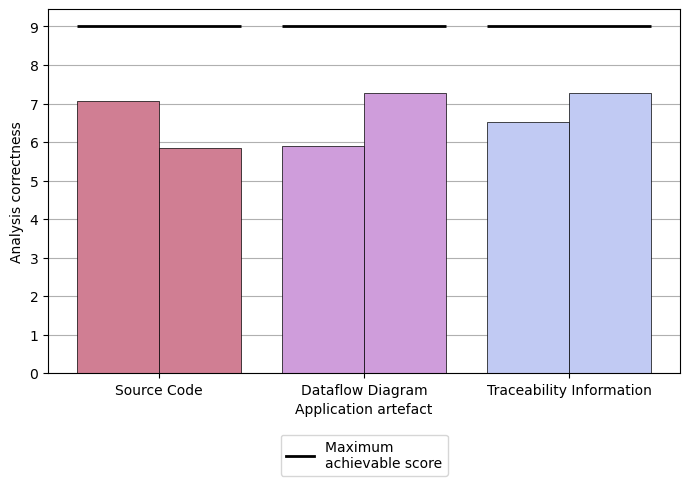

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# Manually provide the data
labels = ("Source Code", "Dataflow Diagram", "Traceability Information")
max_scores = [9, 9, 9]
scores_group_a = [average_score_code_users, 
                    average_score_dfd_users, 
                    average_score_traceability_users]
scores_group_b = [average_score_non_code_users, 
                    average_score_non_dfd_users, 
                    average_score_non_traceability_users]

    
# Combine the data into a dictionary
resource_usage = {"Not Using Artefact": scores_group_b, "Using Artefact": scores_group_a}

# Choose a color palette
palette = [(0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
            (0.812420762188067, 0.6167295569758052, 0.8578575836301946),
            (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]

fig, ax = plt.subplots(figsize=(7, 5))

num_resources = len(labels)

bar_width = 0.4  # Adjust the width of the bars
gap_width = 0.2  # Adjust the width of the gaps between pairs of bars

# Create empty lists to store handles and labels
handles = []
legend_labels = []

# Create an array with positions for the bars
positions = np.arange(num_resources) * (bar_width * 2 + gap_width)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    
    # Adjust the positions of the bars based on the index
    for i, (label, value) in enumerate(zip(labels, resource)):
        color = palette[i]
        resource_positions = positions[i] + index * bar_width
        p = ax.bar(resource_positions, value, bar_width, label=boolean, color=color, edgecolor='black', linewidth=0.5)
        
    # Append the handle (p) and the label (boolean) to the lists
    handles.append(p)
    legend_labels.append(boolean)

for resource_position, max_score in zip(positions, max_scores):
    ax.hlines(max_score, resource_position - bar_width / 2, resource_position + bar_width * 2 - bar_width / 2, colors='k', linewidth=2, linestyles='solid')

    
#ax.set_title("Average score with / without provided DFD.")

# Set axis labels
ax.set_xlabel("Application artefact")
ax.set_ylabel("Analysis correctness")

# Update x-axis tick positions and labels
ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(0, 10, 1.0))
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Create a Line2D object for the maximum achievable score lines
max_score_line = Line2D([0], [0], color='k', linewidth=2, linestyle='solid', label='Maximum \nachievable score')

# Add the Line2D object to the list of handles and legend labels
handles.append(max_score_line)
legend_labels.append(max_score_line.get_label())

# Reorder the handles and labels as desired
desired_order = [2]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

# Create a custom legend with the specified order and place it outside the figure
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol = 3)

# Remove color from legend entries
# legend = ax.legend(
#     handles,
#     legend_labels,  # Use legend_labels that include boolean and hatch
#     loc='upper center',
#     bbox_to_anchor=(0.5, -0.15),
#     ncol=3,
# )
# for handle in legend.legend_handles[:2]:
#     handle.set_facecolor('none')


plt.tight_layout()
plt.savefig("./plots/average_score_resources.pdf", dpi=900)
plt.show()


## Comparing correctness of evidence between groups Using Artefact and Not Using Artefact

For each resource, we separate the participants into: \
    - Using Artefact group = those that gave that resource more than 50% as answer to the questions of which resource was used \
    - Not Using Artefact group = the others \
Then, we compare the average scores of the two groups.

In [19]:
number_none_users, number_non_none_users = 0, 0
evidence_none_users, evidence_non_none_users = 0, 0

number_documentation_users, number_non_documentation_users = 0, 0
evidence_documentation_users, evidence_non_documentation_users = 0, 0

number_code_users, number_non_code_users = 0, 0
evidence_code_users, evidence_non_code_users = 0, 0

number_dfd_users, number_non_dfd_users = 0, 0
evidence_dfd_users, evidence_non_dfd_users = 0, 0

number_traceability_users, number_non_traceability_users = 0, 0
evidence_traceability_users, evidence_non_traceability_users = 0, 0

for line_nr in range(len(df_model_supported)):
    # number of "DFD" answers in questions for resource
    none_uses, documentation_uses, code_uses, dfd_uses, traceability_uses  = 0, 0, 0, 0, 0
    for answer in ["Task1_resource", "Task2_resource", "Task3_resource", "Task4_resource", "Task5_resource", "Task6_resource"]:
        if "0" in str(df_model_supported[answer][line_nr]):
            none_uses += 1
        if "1" in str(df_model_supported[answer][line_nr]):
            documentation_uses += 1
        if "2" in str(df_model_supported[answer][line_nr]):
            code_uses += 1
        if "3" in str(df_model_supported[answer][line_nr]):
            dfd_uses += 1
        if "4" in str(df_model_supported[answer][line_nr]):
            traceability_uses += 1
    # if number of usages if 4 or higher (i.e. above 50%) for a given resource, add that participant's score to one var, else to another.
    # none
    if none_uses >= 4:
        number_none_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_none_users += df_model_supported[answer][line_nr]
    else:
        number_non_none_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_none_users += df_model_supported[answer][line_nr]
    
    # documentation
    if documentation_uses >= 4:
        number_documentation_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_documentation_users += df_model_supported[answer][line_nr]
    else:
        number_non_documentation_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_documentation_users += df_model_supported[answer][line_nr]
    
    # code
    if code_uses >= 4:
        number_code_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_code_users += df_model_supported[answer][line_nr]
    else:
        number_non_code_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_code_users += df_model_supported[answer][line_nr]
    
    # dfd
    if dfd_uses >= 4:
        number_dfd_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_dfd_users += df_model_supported[answer][line_nr]
    else:
        number_non_dfd_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_dfd_users += df_model_supported[answer][line_nr]
            
    # traceability
    if traceability_uses >= 4:
        number_traceability_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_traceability_users += df_model_supported[answer][line_nr]
    else:
        number_non_traceability_users += 1
        for answer in ["Task1_correctness_of_evidence", "Task2_correctness_of_evidence", "Task3_correctness_of_evidence", "Task4_correctness_of_evidence", "Task5_correctness_of_evidence", "Task6_correctness_of_evidence"]:
            evidence_non_traceability_users += df_model_supported[answer][line_nr]
#    print(dfd_uses, score_dfd_users)

average_evidence_code_users = evidence_code_users / number_code_users
average_evidence_non_code_users = evidence_non_code_users / number_non_code_users

average_evidence_dfd_users = evidence_dfd_users / number_dfd_users
average_evidence_non_dfd_users = evidence_non_dfd_users / number_non_dfd_users

average_evidence_traceability_users = evidence_traceability_users / number_traceability_users
average_evidence_non_traceability_users = evidence_non_traceability_users / number_non_traceability_users

print(f"Number code users: {number_code_users}")
print(f"Average evidence code users: {average_evidence_code_users}")
print(f"Average evidence non-code users: {average_evidence_non_code_users}")
print(f"Increase of: {((average_evidence_code_users / average_evidence_non_code_users) - 1) * 100}%")
print("\n")
print(f"Number DFD users: {number_dfd_users}")
print(f"Average evidence DFD users: {average_evidence_dfd_users}")
print(f"Average evidence non-DFD users: {average_evidence_non_dfd_users}")
print(f"Increase of: {((average_evidence_dfd_users / average_evidence_non_dfd_users) - 1) * 100}%")
print("\n")
print(f"Number traceability users: {number_traceability_users}")
print(f"Average evidence traceability users: {average_evidence_traceability_users}")
print(f"Average evidence non-traceability users: {average_evidence_non_traceability_users}")
print(f"Increase of: {((average_evidence_traceability_users / average_evidence_non_traceability_users) - 1) * 100}%")


Number code users: 6
Average evidence code users: 3.0
Average evidence non-code users: 2.611111111111111
Increase of: 14.893617021276583%


Number DFD users: 15
Average evidence DFD users: 2.466666666666667
Average evidence non-DFD users: 3.111111111111111
Increase of: -20.714285714285708%


Number traceability users: 7
Average evidence traceability users: 5.857142857142857
Average evidence non-traceability users: 1.411764705882353
Increase of: 314.8809523809523%


### Plotting scores for correctness of evidence for the two groups

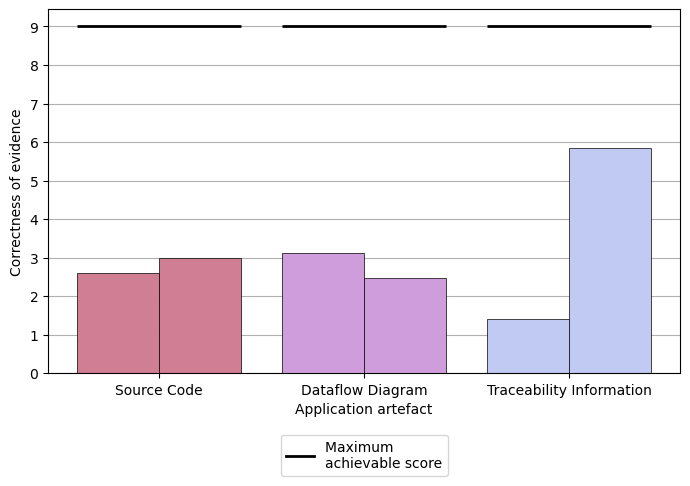

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.lines import Line2D

# Manually provide the data
labels = ("Source Code", "Dataflow Diagram", "Traceability Information")
max_scores = [9, 9, 9]
evidence_group_a = [average_evidence_code_users, 
                    average_evidence_dfd_users, 
                    average_evidence_traceability_users]
evidence_group_b = [average_evidence_non_code_users, 
                    average_evidence_non_dfd_users, 
                    average_evidence_non_traceability_users]

    
# Combine the data into a dictionary
resource_usage = {"Not Using Artefact": evidence_group_b, "Using Artefact": evidence_group_a}

# Choose a color palette
palette = [(0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
            (0.812420762188067, 0.6167295569758052, 0.8578575836301946),
            (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]

fig, ax = plt.subplots(figsize=(7, 5))

num_resources = len(labels)

bar_width = 0.4  # Adjust the width of the bars
gap_width = 0.2  # Adjust the width of the gaps between pairs of bars

# Create empty lists to store handles and labels
handles = []
legend_labels = []

# Create an array with positions for the bars
positions = np.arange(num_resources) * (bar_width * 2 + gap_width)

for index, (boolean, resource) in enumerate(resource_usage.items()):
    
    # Adjust the positions of the bars based on the index
    for i, (label, value) in enumerate(zip(labels, resource)):
        color = palette[i]
        resource_positions = positions[i] + index * bar_width
        p = ax.bar(resource_positions, value, bar_width, label=boolean, color=color, edgecolor='black', linewidth=0.5)
        
    # Append the handle (p) and the label (boolean) to the lists
    handles.append(p)
    legend_labels.append(boolean)

for resource_position, max_score in zip(positions, max_scores):
    ax.hlines(max_score, resource_position - bar_width / 2, resource_position + bar_width * 2 - bar_width / 2, colors='k', linewidth=2, linestyles='solid')

# Set axis labels
ax.set_xlabel("Application artefact")
ax.set_ylabel("Correctness of evidence")

# Update x-axis tick positions and labels
ax.set_xticks(positions + bar_width / 2)
ax.set_xticklabels(labels)

ax.set_yticks(np.arange(0, 10, 1.0))
ax.grid(axis = 'y')
ax.set_axisbelow(True)

# Create a Line2D object for the maximum achievable score lines
max_score_line = Line2D([0], [0], color='k', linewidth=2, linestyle='solid', label='Maximum \nachievable score')

# Add the Line2D object to the list of handles and legend labels
handles.append(max_score_line)
legend_labels.append(max_score_line.get_label())

# Reorder the handles and labels as desired
desired_order = [2]
handles = [handles[i] for i in desired_order]
legend_labels = [legend_labels[i] for i in desired_order]

# Create a custom legend with the specified order and place it outside the figure
ax.legend(handles, legend_labels, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol = 3)

# Remove color from legend entries
#legend = ax.legend(
#    handles,
#    legend_labels,  # Use legend_labels that include boolean and hatch
#    loc='upper center',
#  
# 
#    
plt.tight_layout()
plt.savefig("./plots/average_evidence_resources.pdf", dpi=900)
plt.show()


### Scatterplot for time

We create a scatterplot of the time required to solve all tasks and the achieved score to visually assess.

#### Model-supported

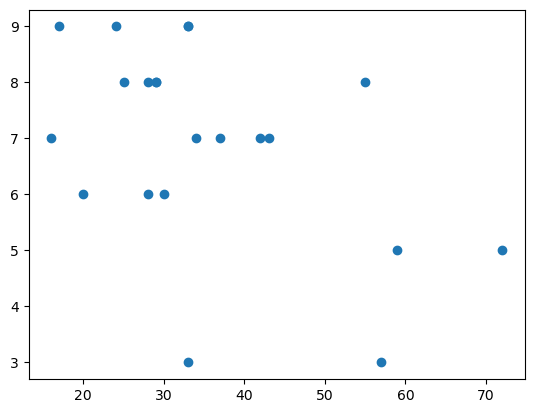

In [26]:
times_model_supported = df_model_supported["Time (minutes)"]
scores_model_supported = df_model_supported_overall_score

plt.scatter(times_model_supported, scores_model_supported)
plt.savefig("./plots/time_scatterplot_model_supported.pdf", dpi=900)
plt.show()

#### Control

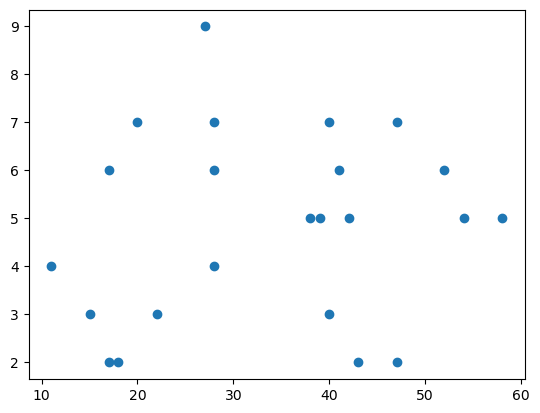

In [27]:
times_control = df_control["Time (minutes)"]
scores_control = df_control_overall_score

plt.scatter(times_control, scores_control)
plt.savefig("./plots/time_scatterplot_control.pdf", dpi=900)
plt.show()